# Welcome to my notebook :)

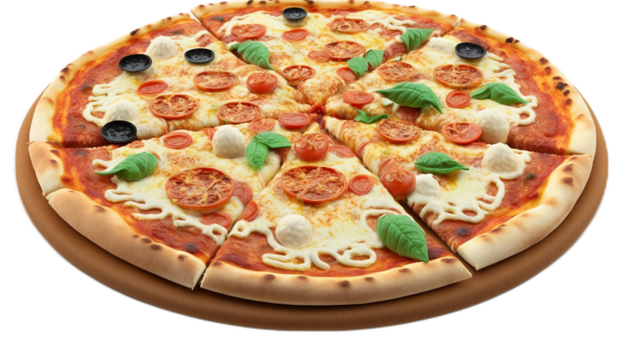

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 500)

In [ ]:
df = pd.read_csv("/kaggle/input/pizza-sales-dataset/pizza_sales.csv")
df

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="pizza_category", palette="YlGnBu")
plt.title("Sales by Pizza Category")
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="pizza_category", palette="YlGnBu", hue="unit_price")
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize='small')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))

df["pizza_name"].value_counts().head(20).sort_values(ascending=True)\
.plot(kind="barh", color=sns.color_palette("YlGnBu")[2])
plt.title("Sales by Pizza Name")

plt.show()

In [ ]:
plt.figure(figsize=(10,5))
color_palette = sns.color_palette("YlGnBu")
size = df["pizza_size"].value_counts()
size["XL + XXL"] = size["XL"] + size["XXL"]
size = size.drop(["XL", "XXL"])


plt.pie(data = size,\
        x=size.values, labels = size.index, \
        explode=(0.1,0,0,0), autopct='%1.0f%%', \
        shadow=True, colors=color_palette)
plt.title("Distribution of Pizza Sizes")
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = df, x= 'total_price', y='pizza_size', hue="pizza_category", palette="YlGnBu_r")
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x= 'order_date')
plt.locator_params(axis='x', nbins=10)
plt.title("Sales by Day")
plt.show()

In [ ]:
df["order_date"].value_counts().head()

In [ ]:
frequency = {}
for row in df["pizza_ingredients"].str.split(","):
    for word in row:
        word = word.strip()
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
frequency_df = pd.DataFrame.from_dict([frequency]).T.sort_values(by=0, ascending=False).head(10)


In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data = frequency_df, x=0, y=frequency_df.index, palette=sns.color_palette("YlGnBu_r"))
plt.title("Most Used Ingredients")
plt.show()